<a href="https://colab.research.google.com/github/HarryMorley/hello-world/blob/main/NLP_1_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

barcelona_control = pd.read_csv('/content/Barcelona_Control_19_23.csv')
barcelona_treatment = pd.read_csv('/content/Barcelona_Treatment_12_16.csv')
Alicante_control = pd.read_csv('/content/Alicante_before.csv')
Alicante_treatment = pd.read_csv('/content/Alicante_festival.csv')

data = pd.concat([barcelona_control, barcelona_treatment,lisbon_control, lisbon_treatment])

data

FileNotFoundError: [Errno 2] No such file or directory: '/content/Barcelona_Control_19_23.csv'

In [115]:
from langdetect import detect, LangDetectException

data['Descriptions'] = data['Descriptions'].astype(str)

# Define function to detect the language
def detect_language(text):
    try:
        return detect(text)

# Apply the function to the df
data['language'] = data['Descriptions'].apply(detect_language)


In [116]:
# Remove descriptions that are not in Spanish
data = data[data['language'] == 'es']

In [140]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

data['Description'] = data['Descriptions'].fillna('')
data['Descriptions'] = data['Descriptions'].astype(str)

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

nltk.download('stopwords')

spanish_stopwords = stopwords.words('spanish')

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words=spanish_stopwords, ngram_range=(1,1))

# Fit and transform the processed descriptions to a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Descriptions'])

# Get the feature names
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Sum the TF-IDF scores for each term across all documents
sum_tfidf = tfidf_matrix.sum(axis=0)

# Sort indices in descending order of TF-IDF scores
sorted_indices = np.argsort(sum_tfidf).flatten()[::-1]

# Get the top 100 words and their scores
top_100_words = feature_names[sorted_indices[:100]]
top_100_scores = np.array(sum_tfidf)[0, sorted_indices[:100]]

# Print the top 100 words with their TF-IDF scores
for word, score in zip(top_100_words, top_100_scores):
    print(f"{word}")

# Ensure that the data extracted is 1-dimensional
top_100_words = feature_names[sorted_indices[:100]].flatten()
top_100_scores = np.array(sum_tfidf)[0, sorted_indices[:100]].flatten()

<ipython-input-140-7a9414892940>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data['Descriptions'].fillna('')
<ipython-input-140-7a9414892940>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Descriptions'] = data['Descriptions'].astype(str)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['viajen' 'reembolsable' 'utilizada' ... 'apartamento' 'alojamiento' 'km']


In [141]:
top_100_df

,TF-IDF Score,Word
5895,480.432345,km
5894,367.156813,alojamiento
5893,279.673814,apartamento
5892,277.191516,aeropuerto
5891,258.606712,lisboa
...,...,...
11,0.089445,abonarse
10,0.089445,aloje
5,0.089445,cargos
7,0.089445,cunas


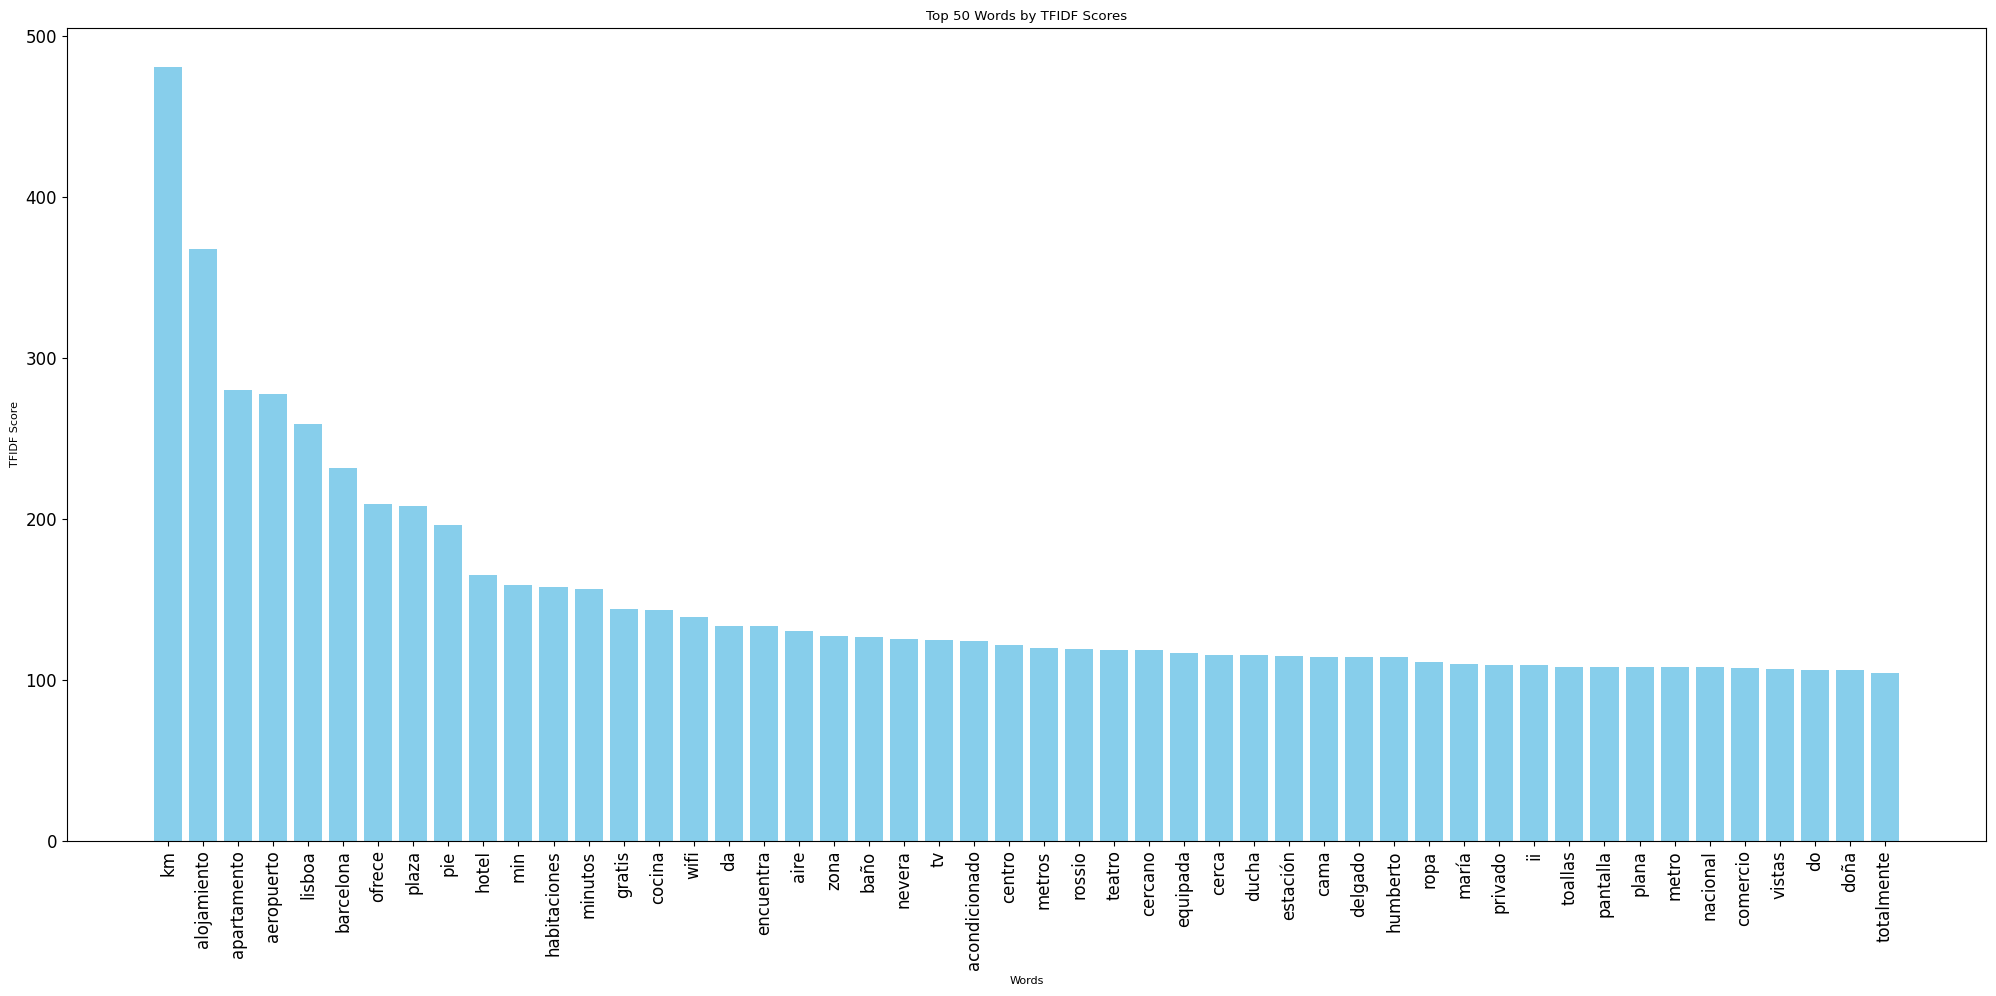

In [138]:
#Now we plot the top words in the TFIDF matrix by their score

import matplotlib.pyplot as plt
import pandas as pd

top_100_df = top_100_df.sort_values('TF-IDF Score', ascending=False)

top_50_df = top_100_df[:50]

# Proceed to plot
plt.figure(figsize=(20, 10))  # Adjust figure size for better visibility
plt.bar(top_50_df['Word'], top_50_df['TF-IDF Score'], color='skyblue')

plt.ylabel('TFIDF Score')
plt.xlabel('Words')
plt.title('Top 50 Words by TFIDF Scores')

# Rotate the x labels to fit them better and set font size to small
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  # Adjust layout
plt.show()



In [144]:
top_100_df[0:100]['Word']

5895             km
5894    alojamiento
5893    apartamento
5892     aeropuerto
5891         lisboa
           ...     
5800           solo
5799         lisbon
5798       traslado
5797         consta
5796       cataluña
Name: Word, Length: 100, dtype: object


In [123]:
#First we need to convert the comma to a dot:

data['Rating'] = data['Rating'].str.replace(',', '.').astype(float)

#And convert price to a float:

data['Price'] = data['Price'].str.replace('€', '').str.strip().replace(',', '.', regex=True).astype(float)

#Now we impute NAs:

from sklearn.impute import KNNImputer

data_for_imputation = data[['Rating']]

imputer = KNNImputer(n_neighbors=10)

data_imputed = imputer.fit_transform(data_for_imputation)

data['Rating'] = data_imputed[:, 0]

<ipython-input-123-cde02c97e5e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rating'] = data['Rating'].str.replace(',', '.').astype(float)
<ipython-input-123-cde02c97e5e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].str.replace('€', '').str.strip().replace(',', '.', regex=True).astype(float)
<ipython-input-123-cde02c97e5e1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [124]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'data' is your DataFrame
data['Rating'] = data['Rating'].astype(float)  # Convert Rating to float

# Create dummy variables for selected words
selected_words = [
    'jabones',
    'champús',
    'terapias',
    'celebración',
    'electrónico',
    'textiles',
    'citrus',
    'ajardinada',
    'infusion',
    'espaciosa',
    'dj',
    'fregadero',
    'asistente',
    'atardecer',
]

# Initialize columns for selected words with 0s
for word in selected_words:
    data[f"word_{word}"] = data['Descriptions'].apply(lambda x: 1 if word in x else 0)

data['Treatment_Interaction'] = data['Treatment_City'] * data['Treatment_Period']

import statsmodels.api as sm

X = data[['Treatment_Period', 'Treatment_City', 'Treatment_Interaction', 'Rating'] + [f"word_{word}" for word in selected_words]]

X = sm.add_constant(X)

y = data['Price']  # Making sure 'Price' is of float type for the regression

# Running the regression
model = sm.OLS(y, X).fit()

print(model.summary())



<ipython-input-124-42e06a3683cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rating'] = data['Rating'].astype(float)  # Convert Rating to float
<ipython-input-124-42e06a3683cc>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"word_{word}"] = data['Descriptions'].apply(lambda x: 1 if word in x else 0)
<ipython-input-124-42e06a3683cc>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     53.94
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          1.00e-147
Time:                        17:21:34   Log-Likelihood:                -29279.
No. Observations:                4066   AIC:                         5.859e+04
Df Residuals:                    4050   BIC:                         5.869e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   596.99

<ipython-input-124-42e06a3683cc>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"word_{word}"] = data['Descriptions'].apply(lambda x: 1 if word in x else 0)
<ipython-input-124-42e06a3683cc>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Treatment_Interaction'] = data['Treatment_City'] * data['Treatment_Period']


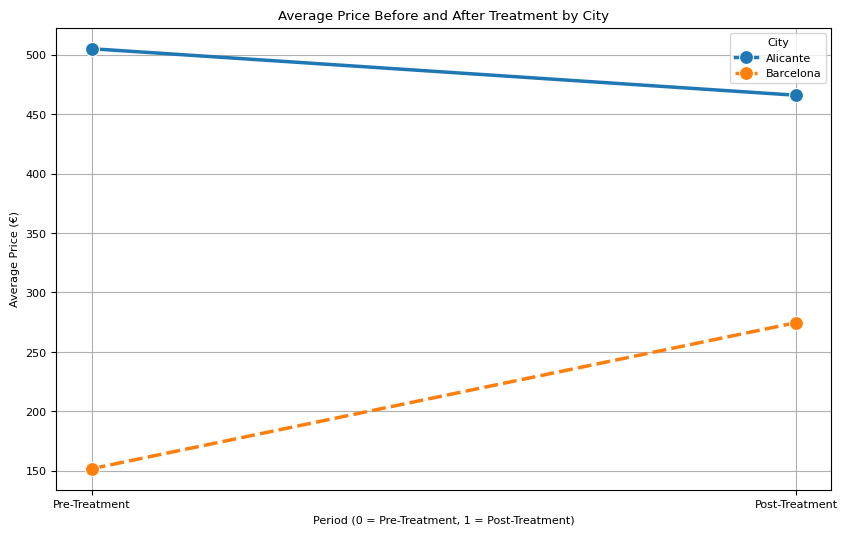

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and you've already calculated 'average_outcomes' as shown previously

# Example data structure for 'average_outcomes'
# average_outcomes = pd.DataFrame({
#     'Treatment_City': [0, 0, 1, 1],
#     'Treatment_Period': [0, 1, 0, 1],
#     'Price': [100, 110, 120, 130]  # These are example average prices
# })

# Map Treatment_City back to a categorical variable for clearer plotting
average_outcomes['City'] = average_outcomes['Treatment_City'].map({0: 'Alicante', 1: 'Barcelona'})

# Plotting
plt.figure(figsize=(10, 6))

sns.lineplot(data=average_outcomes, x='Treatment_Period', y='Price', hue='City', marker='o', style='City', markersize=10, linewidth=2.5)

plt.title('Average Price Before and After Treatment by City')
plt.xlabel('Period (0 = Pre-Treatment, 1 = Post-Treatment)')
plt.ylabel('Average Price (€)')
plt.xticks([0, 1], ['Pre-Treatment', 'Post-Treatment'])
plt.legend(title='City')

plt.grid(True)
plt.show()


In [84]:
X.columns

Index(['const', 'Treatment_Period', 'Treatment_City', 'Treatment_Interaction',
       'Rating', 'word_concierge', 'word_massages', 'word_individually',
       'word_ironing', 'word_maid', 'word_laundry', 'word_cleaning',
       'word_terraces', 'word_pools', 'word_babysitting', 'word_dry'],
      dtype='object')

In [62]:
print(data.dtypes)

Unnamed: 0            int64
Hotel Name           object
Rating               object
Price               float64
Hotel URL            object
Descriptions         object
Treatment_Period      int64
Treatment_City        int64
Description          object
dtype: object


In [35]:
data

,Unnamed: 0,Hotel Name,Rating,Price,Hotel URL,Descriptions,Treatment_Period,Treatment_City,Description
0,0,Casa Abamita,"8,5",€ 1.104,https://www.booking.com/hotel/es/mayerling-aba...,Los Apartamentos Mayerling Abamita se encuentr...,0,1,Los Apartamentos Mayerling Abamita se encuentr...
1,1,ME Barcelona,"9,2",€ 2.564,https://www.booking.com/hotel/es/me-barcelona-...,ME Barcelona es un alojamiento con una ubicaci...,0,1,ME Barcelona es un alojamiento con una ubicaci...
2,2,SM Hotel Teatre Auditori,"8,5",€ 960,https://www.booking.com/hotel/es/teatre-audito...,El SM Hotel Teatre Auditori se encuentra frent...,0,1,El SM Hotel Teatre Auditori se encuentra frent...
3,3,Catalonia Sagrada Familia,"8,2",€ 1.003,https://www.booking.com/hotel/es/cataloniaarag...,El Catalonia Sagrada Familia se halla a 15 min...,0,1,El Catalonia Sagrada Familia se halla a 15 min...
4,4,Hostal Levante Barcelona,"7,9",€ 828,https://www.booking.com/hotel/es/hostal-levant...,El Hostal Levante Barcelona está situado a sol...,0,1,El Hostal Levante Barcelona está situado a sol...
...,...,...,...,...,...,...,...,...,...
1021,1021,Ando Living - Douradores Townhouse,"9,5",€ 2.555,https://www.booking.com/hotel/pt/ando-dourador...,Ando Living - Douradores Townhouse ofrece aloj...,1,0,Ando Living - Douradores Townhouse ofrece aloj...
1022,1022,Stay like a local @ Bright Tagus View Apartment,NaN,€ 581,https://www.booking.com/hotel/pt/stay-like-a-l...,Stay like a local @ Bright Tagus View Apartmen...,1,0,Stay like a local @ Bright Tagus View Apartmen...
1023,1023,WHome | Luxury Chiado Prime Apartment,"7,6",€ 1.548,https://www.booking.com/hotel/pt/chiado-suprem...,WHome | Luxury Chiado Prime Apartment ofrece w...,1,0,WHome | Luxury Chiado Prime Apartment ofrece w...
1024,1024,Nesha Guesthouse Lisbon,"8,1",€ 265,https://www.booking.com/hotel/pt/nesha-guestho...,Nesha Guesthouse Lisbon se encuentra en Lisboa...,1,0,Nesha Guesthouse Lisbon se encuentra en Lisboa...
